# Decision Tree works on the concept of recursive partitioning of the given data to make decesions 

-mainly in DT we need to identify best attribute to make the decision

-ROOTNODE= this is node  from where Decision treee starts (Initial Decision node) (Best attribute)
    
   - it represents entire
   - This node further get divided into 2 or more nodes


-Decsion Node= this is node which makes decesion or it get furthur divided in to another decesion node

Leaf/Terminal Node= this node gives final output foreach decesion made, this node won't get further divided, it is also called as terminal node

Splitting : Dividing decesion , root node furthur based on the decision


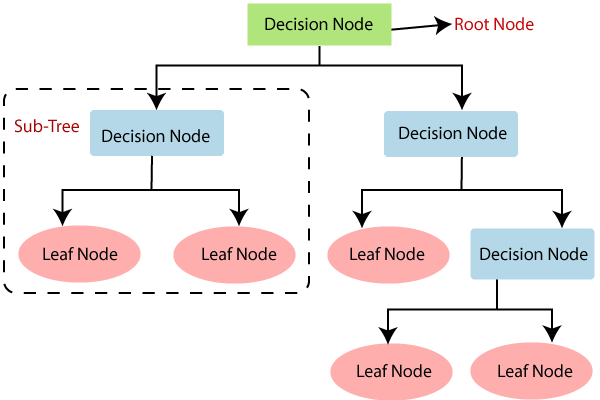

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Machine Learning/images/decision-tree-classification-algorithm.png')

In [ ]:
# to make decision we need to choose best attribute
# ID3 Algorithm : this algo uses Entropy and Information gain to choose best attribute, then based attribute choosen it build decesion tree
#cart : classification and regression tree
#CHAID: chi square automatic interaction and detection method 
#C4.5 # which is succesor to ID3

#all algorithm mentioned are based on ID3 algorithm, depending on criteria used to compute attribute changes in different algorithm


# Entropy = measureof randomness or uncertainity

# ID3 Decision Tree algorithm 
1. First we select root which consist of original set S
2. we select best attribute to make initial decesion 
 
 - using entropy and information gain we choose the best attribute
 - entropy is measure of randomness in data
 - here attribute having lowest entropy and high info gain will be selected as best attribute
3. make decesion based on choosen attribute
4. furthur decesion will be made by selecting the best attribute among attributes left out
5. this process will be repeated(algorithm continoues to recur) till we don't have any further decesion to make

In [ ]:
import math
pA= 5/14
pB=9/14
ES= pA*math.log2(pA)- pB*math.log2(pB)
print(ES)

-0.1207332035938275


In [ ]:
#normal cholestrrol
pA= 2/8
pB=6/8
ES= pA*math.log2(pA)- pB*math.log2(pB)
print(ES)

-0.18872187554086717


In [ ]:
#high cholestrrol
pA= 3/6
pB=3/6
ES= pA*math.log2(pA)- pB*math.log2(pB)
print(ES)

0.0


In [1]:
# we learn how Alogorithm Works 
# Use the library to slove ML Problems (Build The Application)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/Social_Network_Ads.csv') 
Data.head()
#age and estimated salary columns are features(predictors)
# purchase columns is target

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
Data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


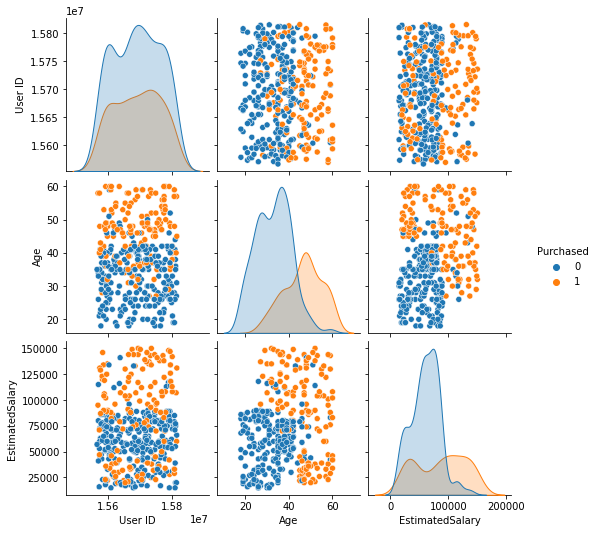

In [13]:
sns.pairplot(data=Data,hue= 'Purchased')

In [5]:
#split data into predictors and targets
Predictors= Data.iloc[:,2:4]
Target= Data.iloc[:,-1:]
print(Predictors.head())
print(Target.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
   Purchased
0          0
1          0
2          0
3          0
4          0


In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(Predictors)
print(X)

In [7]:
#feature engineering
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, Target,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(320, 2) (320, 1)
(80, 2) (80, 1)


** Decision Tree algorithm **

In [14]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.4861111111111111, 0.9642857142857143, 'X[0] <= 0.654\nentropy = 0.957\nsamples = 320\nvalue = [199, 121]'),
 Text(0.2777777777777778, 0.8928571428571429, 'X[1] <= 0.61\nentropy = 0.708\nsamples = 228\nvalue = [184, 44]'),
 Text(0.15555555555555556, 0.8214285714285714, 'X[0] <= -0.11\nentropy = 0.256\nsamples = 186\nvalue = [178, 8]'),
 Text(0.13333333333333333, 0.75, 'entropy = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.17777777777777778, 0.75, 'X[1] <= -0.066\nentropy = 0.533\nsamples = 66\nvalue = [58, 8]'),
 Text(0.15555555555555556, 0.6785714285714286, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.2, 0.6785714285714286, 'X[1] <= 0.404\nentropy = 0.799\nsamples = 33\nvalue = [25, 8]'),
 Text(0.17777777777777778, 0.6071428571428571, 'X[1] <= 0.022\nentropy = 0.709\nsamples = 31\nvalue = [25, 6]'),
 Text(0.15555555555555556, 0.5357142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.5357142857142857, 'X[0] <= 0.367\nentropy = 0.65\nsamples 

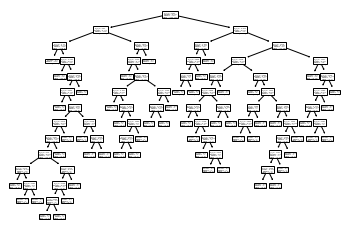

In [20]:
from sklearn import tree
tree.plot_tree(DT)

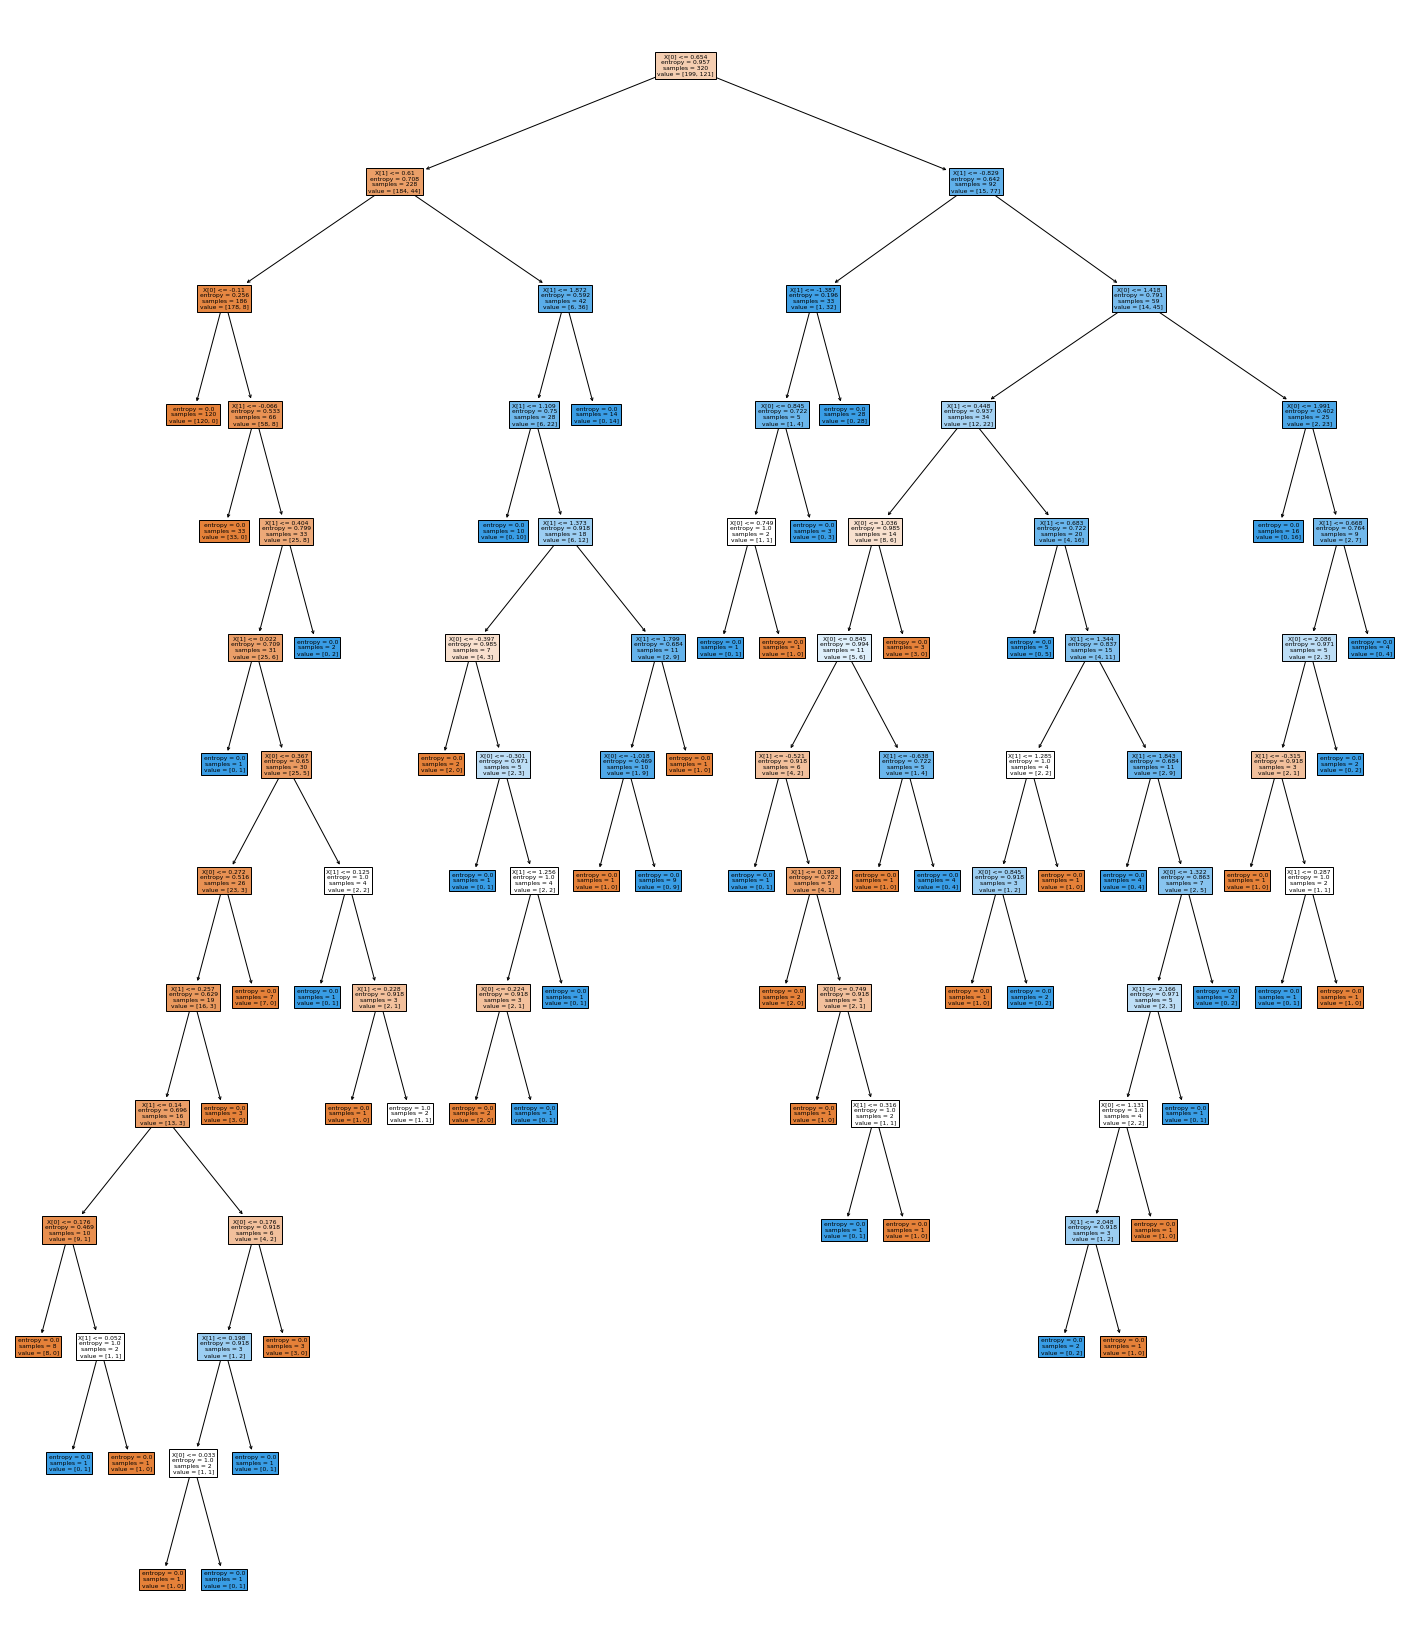

In [21]:
fig= plt.figure(figsize=(25,30))
_=tree.plot_tree(DT, filled=True)

In [15]:
#now check test data
Y_predicted=DT.predict(X_test)#Y predicted data from X_test data

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predicted)
print(CM)

[[53  5]
 [ 3 19]]


In [17]:
Accuracy=((CM[0,0]+CM[1,1])/sum(sum(CM)))*100
print('accuracy of model=',Accuracy,"%")
Precision= (CM[0,0]/(CM[0,0]+CM[1,0]))*100
print('precision of model=',Precision,'%')
Recall=(CM[0,0]/(CM[0,0]+CM[0,1]))*100
print('Recall of model=',Recall,'%')
print('F-Score of model=',(2*Precision*Recall/(Precision+Recall)),'%')

accuracy of model= 90.0 %
precision of model= 94.64285714285714 %
Recall of model= 91.37931034482759 %
F-Score of model= 92.98245614035086 %


In [18]:
from sklearn.metrics import precision_recall_fscore_support
P,RC,F1,Array= precision_recall_fscore_support(Y_test, Y_predicted)

In [19]:
print("precesion=",P[0],'\n','Recall=',RC[0],'\n','F-Score=',F1[0])

precesion= 0.9464285714285714 
 Recall= 0.9137931034482759 
 F-Score= 0.9298245614035087
